In [4]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import sys
import importlib

from utils_orbs.orb_paths import SetupPaths
from utils_orbs.merger_trees import TraceMergerTree
from utils_orbs.readMergerHistoryFiles import FindHistory
from utils_orbs.vectorCorrection import vectorCorrection as vector

paths = SetupPaths()


In [5]:
plt.show();
plt.rcParams.update({'font.size':20,"xtick.direction":"in","ytick.direction":"in", 
                     "xtick.top":True, "ytick.right":True,"text.usetex":False,
                     "xtick.labelsize":12,"ytick.labelsize":12})


In [6]:
f = h5py.File(f"../data/lowmass_z1p5.hdf5", 'r')
pairs = {}
print(f['Header'].attrs.keys())
for key, val in f.items():
    if key == "Header":
        continue
    pairs[key]=np.array(val)
    
f.close()
    

<KeysViewHDF5 ['Details', 'Redshift', 'Simulation', 'Snapshot']>


First test pair:

In [7]:
test1 = pairs['Sub1 ID'][0]
test2 = pairs['Sub2 ID'][0]
redshift = 1.5
scale = 1/(1+redshift)
little_h = 0.6774

boxsize = 75000.0 # in cMpc/h
boxsize_phys = boxsize * scale / little_h    
boxsize_co = boxsize / little_h   
print(boxsize)
print(boxsize_phys)
print(boxsize_co)


75000.0
44286.97962798937
110717.44906997343


In [8]:
hists = FindHistory(paths.path_tnghydro_mergerhist)

In [9]:
info1 = hists.get_info(snapnum=40,subfind_id=test1)
info2 = hists.get_info(snapnum=40,subfind_id=test2)

In [10]:
info1.keys()

dict_keys(['AccretedStellarMassLast2Gyr', 'AccretedStellarMassLast5Gyr', 'AccretedStellarMassLast8Gyr', 'AccretedStellarMassSinceRedshift5', 'MassLastMajorMerger', 'MeanGasFraction', 'MeanLookbackTime', 'MeanMassRatio', 'MeanRedshift', 'MeanRedshiftAtPeakMassLast2Gyr', 'MeanRedshiftAtPeakMassLast5Gyr', 'MeanRedshiftAtPeakMassLast8Gyr', 'MeanRedshiftAtPeakMassSinceRedshift5', 'MeanStellarMassLast2Gyr', 'MeanStellarMassLast5Gyr', 'MeanStellarMassLast8Gyr', 'MeanStellarMassRatioLast2Gyr', 'MeanStellarMassRatioLast5Gyr', 'MeanStellarMassRatioLast8Gyr', 'MeanStellarMassRatioSinceRedshift5', 'MeanStellarMassSinceRedshift5', 'NumMajorMergersLast250Myr', 'NumMajorMergersLast2Gyr', 'NumMajorMergersLast500Myr', 'NumMajorMergersLast5Gyr', 'NumMajorMergersLast8Gyr', 'NumMajorMergersLastGyr', 'NumMajorMergersSinceRedshift5', 'NumMajorMergersSinceRedshiftOne', 'NumMajorMergersSinceRedshiftTwo', 'NumMajorMergersTotal', 'NumMergersLast250Myr', 'NumMergersLast2Gyr', 'NumMergersLast500Myr', 'NumMergersL

In [11]:
print(info1['SnapNumNextMajorMerger'])
print(info2['SnapNumNextMajorMerger'])

44
57


## merger trees

In [13]:
tree1 = TraceMergerTree(snapshot=40,physics="hydro",sim="TNG",subfindID=test1)
tree2 = TraceMergerTree(snapshot=40,physics="hydro",sim="TNG",subfindID=test2)

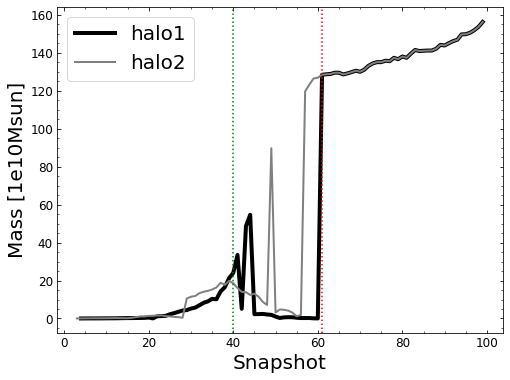

In [41]:
# past and future
fig = plt.figure(figsize=(8,6))
plt.plot(tree1.mergedbranch['SnapNum'],tree1.mergedbranch['SubhaloMass'],'k',label='halo1',lw=4)
plt.plot(tree2.mergedbranch['SnapNum'],tree2.mergedbranch['SubhaloMass'],'grey',label='halo2',lw=2)
plt.axvline(40,color="green",linestyle='dotted')
# plt.axvline(44)
plt.axvline(61,color="red",linestyle='dotted') # snapshot where these two subhalos merge ~ 
plt.legend()
plt.ylabel("Mass [1e10Msun]")
plt.xlabel("Snapshot")
plt.show()

In [26]:
tree1.mergedbranch['SnapNum']

array([99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83,
       82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66,
       65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49,
       48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32,
       31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15,
       14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4], dtype=int16)

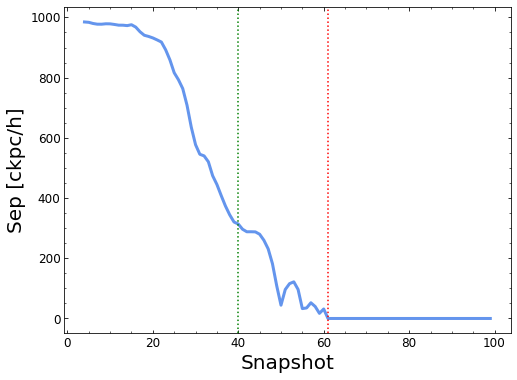

In [42]:
# plot the separations of the two halos plotted above
fig = plt.figure(figsize=(8,6))

sub1 = tree1.mergedbranch
sub2 = tree2.mergedbranch

snap1 = sub1['SnapNum']
snap2 = sub2['SnapNum']

mask1 = np.isin(snap1,snap2)
mask2 = np.isin(snap2,snap1)

pos1 = sub1['SubhaloPos'][mask1]
pos2 = sub2['SubhaloPos'][mask2]
dists = np.linalg.norm(vector(pos1,pos2,75000),axis=1)

plt.plot(sub1['SnapNum'][mask1],dists,color='cornflowerblue',lw=3)

plt.xlabel("Snapshot",y=0.06)
plt.ylabel("Sep [ckpc/h]",x=0.06)
plt.axvline(40,color="green",linestyle='dotted')
# plt.axvline(44)
plt.axvline(61,color="red",linestyle='dotted') # snapshot where
plt.show()

# # past and future
# fig = plt.figure(figsize=(12,8))
# sub1 = tree1.mergedbranch
# sub2 = tree2.mergedbranch

# plt.plot(tree1.mergedbranch['SnapNum'],tree1.mergedbranch['SubhaloMass'],'k',label='halo1',lw=4)
# plt.plot(tree2.mergedbranch['SnapNum'],tree2.mergedbranch['SubhaloMass'],'grey',label='halo2',lw=2)
# plt.axvline(40,color="green",linestyle='dotted')
# # plt.axvline(44)
# plt.axvline(61,color="red",linestyle='dotted') # snapshot where these two subhalos merge ~ 
# plt.legend()
# plt.ylabel("Mass [1e10Msun]")
# plt.xlabel("Snapshot")
# plt.show()


In [12]:
pairs['Sub1 Pos'][0]

array([19096.23824094, 22125.94022781, 25340.79430247])

In [13]:
tree1.pastbranch.__getattribute__('SubhaloPos')
# tree2.mergedbranch['SubhaloPos']

array([[32281.426, 37403.016, 42837.598],
       [32357.947, 37390.516, 42847.64 ],
       [32514.418, 37368.332, 42873.76 ],
       [32640.982, 37349.676, 42896.367],
       [32792.78 , 37328.11 , 42919.867],
       [32940.12 , 37307.164, 42939.113],
       [33082.207, 37287.094, 42952.42 ],
       [33248.03 , 37264.887, 42958.426],
       [33414.35 , 37238.527, 42960.016],
       [33580.11 , 37211.727, 42961.188],
       [33736.7  , 37182.133, 42964.48 ],
       [33897.13 , 37155.688, 42967.45 ],
       [34064.53 , 37120.758, 42976.11 ],
       [34217.28 , 37100.773, 42974.81 ],
       [34370.855, 37101.008, 42970.273],
       [34474.297, 37102.57 , 42971.84 ],
       [34712.445, 37088.637, 42964.67 ],
       [34870.77 , 37084.2  , 42973.07 ],
       [35024.297, 37072.26 , 42970.727],
       [35210.39 , 37060.363, 42944.652],
       [35301.46 , 37057.32 , 42936.176],
       [35423.8  , 37051.54 , 42923.293],
       [35529.598, 37046.133, 42917.477],
       [35661.246, 37044.195, 4291

In [15]:
tree1.mergedbranch['SubfindID']

array([ 405882,  435410,  432154,  430268,  426936,  425024,  424916,
        423773,  420200,  419362,  420870,  416859,  413636,  410201,
        407524,  404492,  400233,  397704,  394265,  388775,  387498,
        380573,  378464,  374581,  370768,  367616,  364258,  360846,
        356353,  352916,  348673,  343509,  338759,  333684,  328716,
        324223,  321610,  316691,  317134,  313692,  308698,  302455,
        300631,  296606,  298381,  295695,  292367,  286093,  283375,
        277279,  273281,  267838,  263460,  257940,  255480,  250621,
        242651,  236069,  229904,  222536,  219586,  212109,  242808,
        240040,  351216,  350249,  342063,  346619,  334547,  365989,
        375259,  324583,  353074,  351646,  344384,  456488,  440229,
        406655,  372976,  350196,  646255,  671068,  643642,  633365,
        574841,  514529,  554751,  695581,  565009,  543198,  641583,
        587365,  582384,  468246,  571589, 1214260], dtype=int32)

snapshots where the two are the same subfind id 

In [18]:
tree1.mergedbranch['SnapNum'][np.where(tree1.mergedbranch['SubfindID'] == tree2.mergedbranch['SubfindID'][0:-1])[0]]


array([99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83,
       82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66,
       65, 64, 63, 62, 61], dtype=int16)

# First 16 pairs

In [32]:
tree1 = {}
tree2 = {}
for i in range(4):
    for j in range(4):
        ind =  i * 4 + j

        tree1[ind] = TraceMergerTree(snapshot=40,physics="hydro",sim="TNG",subfindID=pairs['Sub1 ID'][ind])
        tree2[ind] = TraceMergerTree(snapshot=40,physics="hydro",sim="TNG",subfindID=pairs['Sub2 ID'][ind])

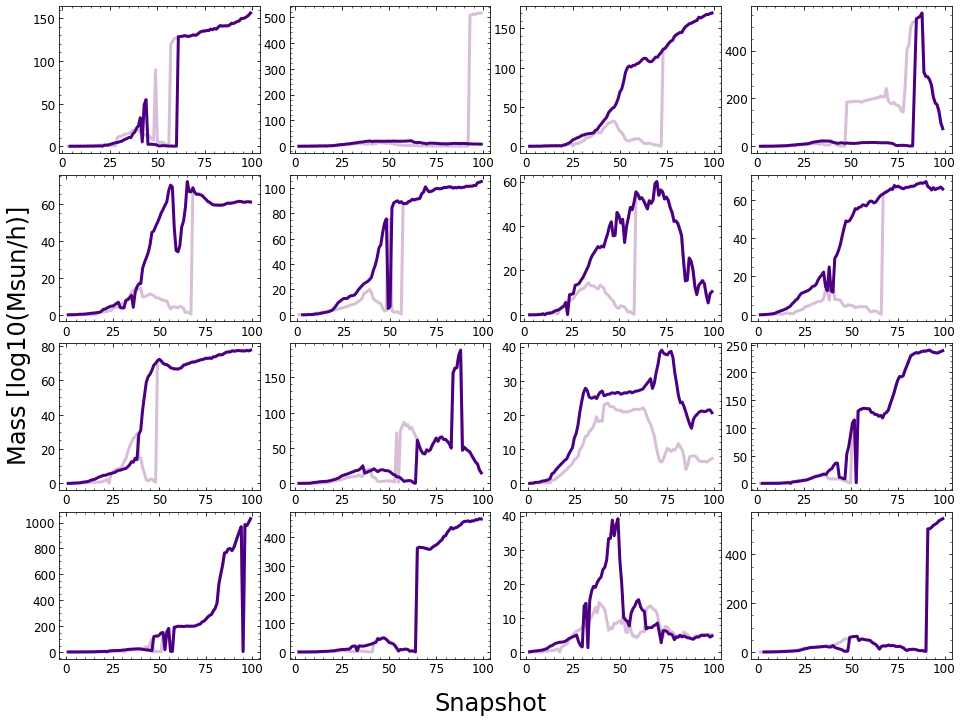

In [100]:
# make a bunch of the plots and see if they all look the same! 
fig,ax = plt.subplots(4,4,figsize=(16,12), sharey=False, sharex=False, gridspec_kw={'width_ratios': [1,1,1,1], 'height_ratios':[1,1,1,1],'wspace': 0.15,"hspace":0.15})

for i in range(4):
    for j in range(4):
        ind =  i * 4 + j
        
        ax[i][j].plot(tree2[ind].mergedbranch['SnapNum'],tree2[ind].mergedbranch['SubhaloMass'],color="thistle",label='halo2',lw=3)
        ax[i][j].plot(tree1[ind].mergedbranch['SnapNum'],tree1[ind].mergedbranch['SubhaloMass'],color='indigo',label='halo1',lw=3)
        

fig.supxlabel("Snapshot",y=0.06)
fig.supylabel("Mass [log10(Msun/h)]",x=0.08)
plt.show()


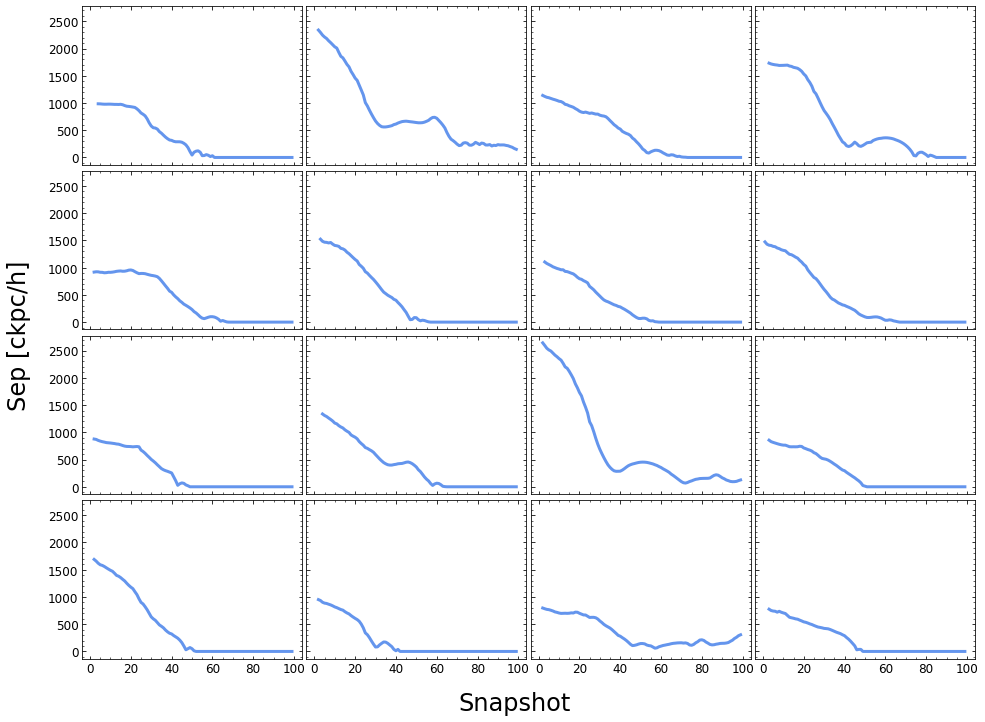

In [110]:
# make a bunch of the plots and see if they all look the same! 
fig,ax = plt.subplots(4,4,figsize=(16,12), sharey=True, sharex=True, gridspec_kw={'width_ratios': [1,1,1,1], 'height_ratios':[1,1,1,1],'wspace': 0.02,"hspace":0.04})

for i in range(4):
    for j in range(4):
        ind =  i * 4 + j
        
        sub1 = tree1[ind].mergedbranch
        sub2 = tree2[ind].mergedbranch
        
        snap1 = sub1['SnapNum']
        snap2 = sub2['SnapNum']

        mask1 = np.isin(snap1,snap2)
        mask2 = np.isin(snap2,snap1)
        
        pos1 = sub1['SubhaloPos'][mask1]
        pos2 = sub2['SubhaloPos'][mask2]
        dists = np.linalg.norm(vector(pos1,pos2,75000),axis=1)
        
        ax[i][j].plot(sub1['SnapNum'][mask1],dists,color='cornflowerblue',label=ind,lw=3)
#         ax[i][j].legend()
#         ax[i][j].plot(tree2[ind].mergedbranch['SnapNum'],tree2[ind].mergedbranch['SubhaloMass'],'r',label='halo2')

# ax[0][0].set_frame_on
fig.supxlabel("Snapshot",y=0.06)
fig.supylabel("Sep [ckpc/h]",x=0.06)
plt.show()


In [53]:
sub1 = tree1[0].mergedbranch
sub2 = tree2[0].mergedbranch

snap1 = sub1['SnapNum']
snap2 = sub2['SnapNum']

mask1 = np.isin(sub1['SnapNum'],sub2['SnapNum'])
mask2 = np.isin(sub2['SnapNum'],sub1['SnapNum'])

pos1 = tree1[0].mergedbranch['SubhaloPos'][mask1]
pos2 = tree2[0].mergedbranch['SubhaloPos'][mask2]
dists = np.linalg.norm(pos1-pos2,axis=1)

In [38]:
snap1 = tree1[0].mergedbranch['SnapNum']
snap1

array([99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83,
       82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66,
       65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49,
       48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32,
       31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15,
       14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4], dtype=int16)

In [42]:
tree1[0].mergedbranch['SnapNum'][mask1]==tree2[0].mergedbranch['SnapNum'][mask2]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [49]:
np.linalg.norm(pos1-pos2,axis=1)

array([  0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
         0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
         0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
         0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
         0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
         0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
         0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
         0.      ,   0.      ,   0.      ,   0.      ,  31.499218,
        17.011234,  39.80664 ,  52.157948,  35.048508,  32.788902,
        96.41822 , 121.70281 , 115.68396 ,  96.18979 ,  44.159313,
       108.49596 , 181.92006 , 231.16365 , 259.74646 , 279.7828  ,
       287.61273 , 288.07993 , 287.9956  , 296.37692 , 313.6356  ,
       320.4211  , 344.08136 , 373.4164  , 408.37674 , 444.98004 ,
       474.1078  , 520.3658  , 540.0154  , 545.3943  , 577.151   ,
       635.23364 , 708.311   , 763.56366 , 792.7762  , 816.185

In [57]:
pos1

array([[14897.581 , 49329.125 , 69849.875 ],
       [14918.2295, 49311.297 , 69883.91  ],
       [14948.737 , 49285.117 , 69934.625 ],
       [14968.85  , 49268.258 , 69967.945 ],
       [15001.912 , 49243.996 , 70016.48  ],
       [15024.011 , 49227.312 , 70049.54  ],
       [15056.191 , 49201.684 , 70100.2   ],
       [15075.465 , 49184.484 , 70134.78  ],
       [15103.73  , 49160.44  , 70183.125 ],
       [15131.965 , 49144.43  , 70216.625 ],
       [15142.359 , 49126.57  , 70249.92  ],
       [15173.877 , 49111.613 , 70269.664 ],
       [15200.35  , 49096.742 , 70304.09  ],
       [15218.384 , 49061.086 , 70394.84  ],
       [15210.465 , 49036.016 , 70442.06  ],
       [15210.792 , 49003.44  , 70495.97  ],
       [15227.04  , 48976.043 , 70541.82  ],
       [15246.582 , 48960.69  , 70569.17  ],
       [15291.58  , 48942.582 , 70604.66  ],
       [15365.211 , 48934.195 , 70630.2   ],
       [15435.442 , 48928.586 , 70659.09  ],
       [15549.895 , 48895.383 , 70749.28  ],
       [15

In [70]:
sub1 = tree1[4].mergedbranch
sub2 = tree2[4].mergedbranch

snap1 = sub1['SnapNum']
snap2 = sub2['SnapNum']

mask1 = np.isin(sub1['SnapNum'],sub2['SnapNum'])
mask2 = np.isin(sub2['SnapNum'],sub1['SnapNum'])

pos1 = tree1[4].mergedbranch['SubhaloPos'][mask1]
pos2 = tree2[4].mergedbranch['SubhaloPos'][mask2]
dists = np.linalg.norm(pos1-pos2,axis=1)
dists[70]

74601.914

In [71]:
pos1[70]

array([41574.086 ,  2422.9395, 74810.98  ], dtype=float32)

In [72]:
pos2[70]

array([42342.37   ,  2388.623  ,   213.02348], dtype=float32)

In [74]:
np.linalg.norm(vector(pos1,pos2,75000),axis=1)

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         3.94334381,  16.05410506,  30.0892608 ,  16.57275513,
        52.81741529,  76.68975297,  92.6136969 ,  99.45733767,
        99.58634552,  89.88662619,  76.34475448,  63.93207034,
        72.72852993,  97.96263585, 133.89737125, 167.59935197,
       192.66845268, 230.87015027, 259.75291809, 284.76497011,
       308.05289134, 329.69945978, 363.2635053 , 391.34562671,
       430.94135359, 462.96293738, 500.05849101, 546.5148262 ,
       568.94868954, 619.78203962, 665.06405086, 712.60